<a href="https://colab.research.google.com/github/IshaghCheikh/ML_With_Ishagh/blob/main/Model_based_VS_Instance_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this notebook i'm trying to measure performances of two different models :
Linear regression model (Model-based)
K-Nearest-Neighbors (Instance-based)

## we want to know if money makes people happy

## Build a Model-based model (LinearRegression)


In [ ]:
pip install pandas xlrd

In [ ]:
pip install pandas openpyxl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.linear_model

## Data Preparation

In [ ]:
import pandas as pd
import numpy as np

# List of 100 countries (sample list)
countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo", "Costa Rica", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini",
    "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada",
    "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia",
    "Iran", "Iraq", "Ireland", "Palestine", "Italy", "Ivory Coast", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya",
    "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein",
    "Lithuania", "Luxembourg", "Mauritania"]







In [ ]:
len(countries)

100

In [ ]:
# Generate random GDP per capita values (in USD) between 1000 and 100,000
gdp_per_capita = np.random.uniform(1000, 100000, 100)

# Define a linear relationship between GDP per capita and life satisfaction mean
# life_satisfaction_mean = a * gdp_per_capita + b + noise
a = 0.0001  # slope of the line (example value)
b = 4       # intercept of the line (example value)
noise = np.random.normal(0, 0.5, 100)  # adding some noise for realism

life_satisfaction = a * gdp_per_capita + b + noise

# Create a DataFrame
df = pd.DataFrame({
    'Country': countries,
    'GDP per capita': gdp_per_capita,
    'Life satisfaction mean': life_satisfaction
})

In [ ]:
df.head()

,Country,GDP per capita,Life satisfaction mean
0,Afghanistan,97904.471729,14.257228
1,Albania,50556.892463,8.165034
2,Algeria,85136.525326,11.962448
3,Andorra,19953.188161,5.423915
4,Angola,17174.700349,6.130594


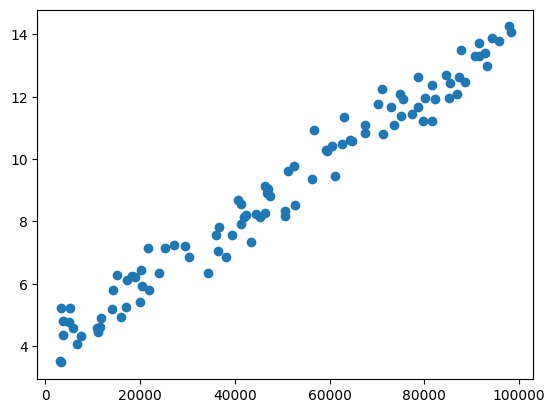

In [ ]:
plt.scatter(df['GDP per capita'], df['Life satisfaction mean'])
plt.show()

### Build the **model**

In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(df[['GDP per capita']], df['Life satisfaction mean'])

LinearRegression()

In [ ]:
model.coef_ , a

(array([0.0001021]), 0.0001)

In [ ]:
model.intercept_ , b


(3.9114044170861213, 4)

In [ ]:
model.predict([[20000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.95330813])

In [ ]:
df[df['Country']=='Mauritania']

,Country,GDP per capita,Life satisfaction mean
99,Mauritania,56324.496156,9.367892


In [ ]:
model.predict([[56324.496156]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.66186431])

In [ ]:
err = df['Life satisfaction mean'] - model.predict(df[['GDP per capita']])

In [ ]:
print(err)

0     0.350248
1    -0.907986
2    -0.640986
3    -0.524613
4     0.465736
        ...   
95    0.640812
96   -0.033613
97   -0.014923
98    0.540775
99   -0.293972
Name: Life satisfaction mean, Length: 100, dtype: float64


# Build an instance-based model (KNN)

In [ ]:
pip install scikit-learn


In [ ]:
import sklearn.neighbors
model_ins = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_ins.fit(df[['GDP per capita']], df['Life satisfaction mean'])

KNeighborsRegressor(n_neighbors=3)

In [ ]:
err_ins = df['Life satisfaction mean'] - model_ins.predict(df[['GDP per capita']])

In [ ]:
print(err_ins)

0     0.215538
1    -0.537951
2    -0.398386
3    -0.502379
4     0.263214
        ...   
95    0.231896
96    0.083729
97   -0.091032
98    0.303644
99   -0.829305
Name: Life satisfaction mean, Length: 100, dtype: float64


In [ ]:
print(np.mean(abs(err)),np.mean(abs(err_ins)))

0.4312021703648409 0.3422382034898765


## Summary

KNN(instance-based learning algorithm) is better than linear regression(model-based learning algorithm)